A base de dados escolhida foi uma base de dados que mostra a quantidade de doses aplicada em todos os países do mundo.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\Cliente\Desktop\EAD\2021-C\Data Science\covid-vaccination-doses-per-capita.csv',sep=",")

Operações:
Operação de groupby, que realiza uma soma do número de vacinados em todos os países a cada dia. Para isso, foi necessário agrupar o database pela data e agregar o total de vacinados daquele dia, sendo realizado portanto operações de agregação e agrupamento.

In [10]:
df_byday = df.groupby(["Day"]).agg({"total_vaccinations_per_hundred":"sum"})
df_byday

,total_vaccinations_per_hundred
Day,
2020-12-01,0.00
2020-12-02,0.00
2020-12-03,0.00
2020-12-04,0.00
2020-12-05,0.00
...,...
2021-10-16,9762.79
2021-10-17,11020.59
2021-10-18,12344.20


Abaixo é utilizado um filtro para que os resultados exibidos sejam apenas do Brasil.

In [25]:
df_bra=df.query("Entity=='Brazil'")
df_bra

,Entity,Code,Day,total_vaccinations_per_hundred
3630,Brazil,BRA,2021-01-16,0.00
3631,Brazil,BRA,2021-01-17,0.00
3632,Brazil,BRA,2021-01-18,0.00
3633,Brazil,BRA,2021-01-19,0.01
3634,Brazil,BRA,2021-01-20,0.01
...,...,...,...,...
3855,Brazil,BRA,2021-10-14,117.21
3856,Brazil,BRA,2021-10-15,119.83
3857,Brazil,BRA,2021-10-17,120.47
3858,Brazil,BRA,2021-10-18,120.53


Agora será utilizado o ultimo dia na base de dados, ou seja, o dia 19/10/2021, que foi o ultimo dia em que todos os países atualizaram os dados.(alguns ja haviam atualizado até dia 20). Através destes dados, utilizarei uma operação para descobrir quais são os 5 mais vacinados.

In [59]:
dfmais=df.query("Day=='2021-10-19'").sort_values("total_vaccinations_per_hundred").tail(5)
dfmais

,Entity,Code,Day,total_vaccinations_per_hundred
25504,Singapore,SGP,2021-10-19,168.10
13964,Israel,ISR,2021-10-19,179.55
30700,Uruguay,URY,2021-10-19,186.73
29596,United Arab Emirates,ARE,2021-10-19,207.59
10846,Gibraltar,GIB,2021-10-19,248.81


Agora, utilizarei a mesma tabela gerada acima, porém buscarei os 5 menos vacinados

In [58]:
dfmenos=df.query("Day=='2021-10-19'").sort_values("total_vaccinations_per_hundred").head(5)
dfmenos

,Entity,Code,Day,total_vaccinations_per_hundred
8804,Ethiopia,ETH,2021-10-19,3.43
16723,Low income,NaN,2021-10-19,4.26
32073,Zambia,ZMB,2021-10-19,4.50
17604,Malawi,MWI,2021-10-19,5.87
15016,Kenya,KEN,2021-10-19,8.50


Vale observar que todos os países menos vacinados até o dia 19( 3 dias atrás) são países aficanos, o que mostra como a desigualdade social afeta a socidade nos mais diversos pontos. 

Agora, serão gerados gráficos sobre os dados gerados acima:

Gráfico de países menos vacinados:

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


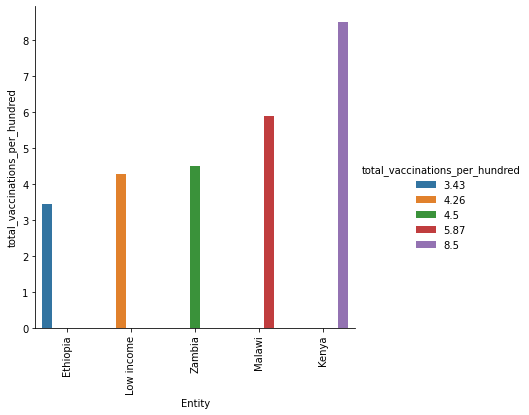

In [60]:
sns.factorplot(x = 'Entity', y='total_vaccinations_per_hundred', 
               hue = 'total_vaccinations_per_hundred',data=dfmenos, kind='bar', height=5)
plt.xticks(rotation=90)
plt.show()

Gráfico de países mais vacinados:

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


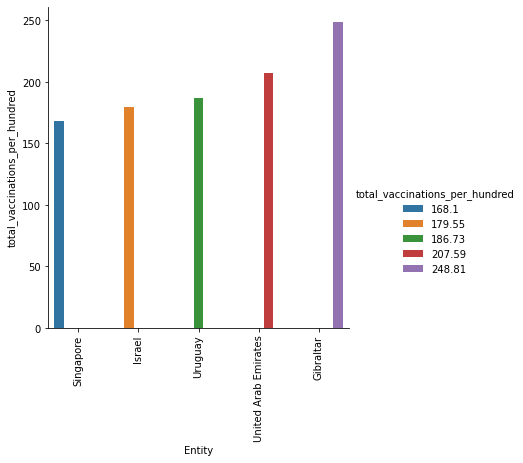

In [62]:
sns.factorplot(x = 'Entity', y='total_vaccinations_per_hundred', 
               hue = 'total_vaccinations_per_hundred',data=dfmais, kind='bar', height=5)
plt.xticks(rotation=90)
plt.show()

Fim!